In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Wine dataset
These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from 3 different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

In [9]:
from sklearn.datasets import load_wine

In [10]:
d = load_wine(as_frame=True)
df_orig = d["data"]
y = np.array(d["target"])

df_orig.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [11]:
df_orig.shape

(178, 13)

In [12]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([59, 71, 48]))

In [13]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [14]:
# adding a fake categorical variable to see how to deal with it
cat_variable_1_values = ["red", "blue", "green"]
df_orig["color"] = [
    cat_variable_1_values[np.random.randint(0, len(cat_variable_1_values))]
    for _ in range(len(df_orig))
]

# creating an ordinal variable
df_orig["alcalinity_of_ash_binned"] = pd.qcut(
    df_orig["alcalinity_of_ash"], q=4, labels=False
)
X_orig = df_orig.values
df_orig.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,color,alcalinity_of_ash_binned
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,red,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,blue,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,red,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,blue,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,green,2


In [15]:
# one-hot encoding of categorical data
categorical_cols = ["color"]

df = pd.get_dummies(df_orig, columns=categorical_cols)
X = df.values
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,alcalinity_of_ash_binned,color_blue,color_green,color_red
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,0,0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,1,0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1,0,0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,1,0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,2,0,1,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  alcal

## Partitioning

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

In [19]:
# without stratify
print(np.unique(y, return_counts=True)[1] / len(y))
print(np.unique(y_train, return_counts=True)[1] / len(y_train))
print(np.unique(y_test, return_counts=True)[1] / len(y_test))

[0.33146067 0.3988764  0.26966292]
[0.32258065 0.39516129 0.28225806]
[0.35185185 0.40740741 0.24074074]


In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=0
)

In [21]:
# with stratify
print(np.unique(y, return_counts=True)[1] / len(y))
print(np.unique(y_train, return_counts=True)[1] / len(y_train))
print(np.unique(y_test, return_counts=True)[1] / len(y_test))

[0.33146067 0.3988764  0.26966292]
[0.33064516 0.40322581 0.26612903]
[0.33333333 0.38888889 0.27777778]


In [22]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(124, 17) (54, 17) (124,) (54,)


## Classifiers
Classifiers usually have a:
- `fit` method to train them on training data
- `predict` method to validate/test them on validation/test data

### Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [24]:
dt = DecisionTreeClassifier()

In [25]:
%%time
dt.fit(X_train, y_train)

CPU times: user 1.81 ms, sys: 494 µs, total: 2.3 ms
Wall time: 2.47 ms


DecisionTreeClassifier()

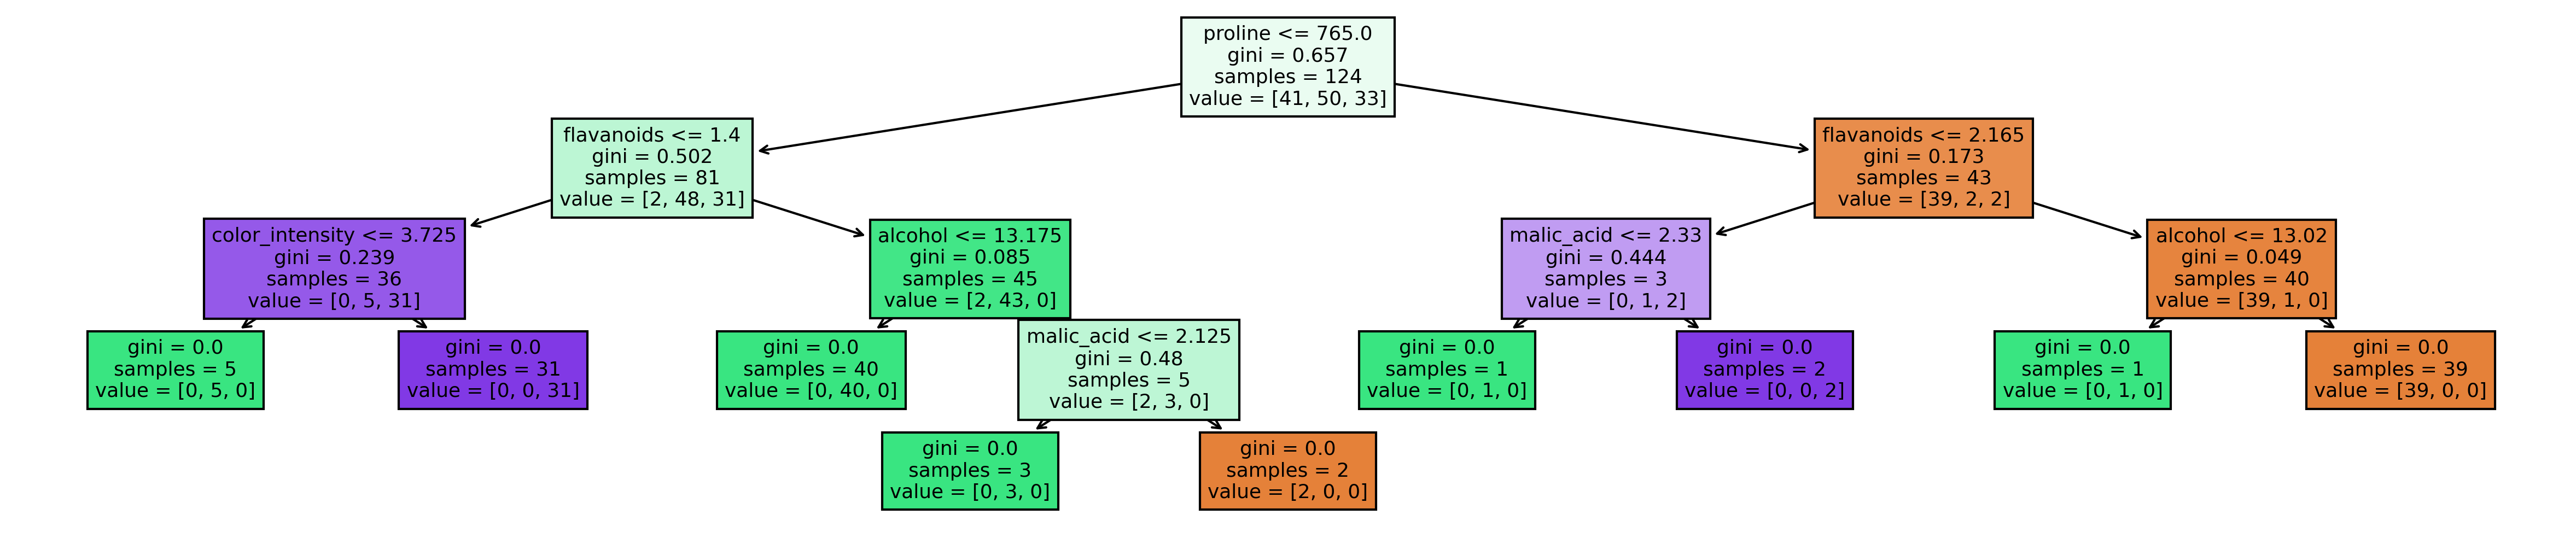

In [26]:
plt.figure(figsize=(20, 4), dpi=300)
plot_tree(dt, feature_names=df.columns, filled=True)
plt.show()

In [27]:
dt.score(X_train, y_train)

1.0

#### Performance evaluation

In [29]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve

# plot_cumulative_gain and plot_lift_curve only work in a binary classification case

In [30]:
y_train_pred = dt.predict(X_train)
print(accuracy_score(y_train, y_train_pred))

1.0


In [ ]:
y_train_pred, y_train

(array([2, 0, 0, 0, 2, 1, 1, 2, 1, 1, 1, 0, 1, 2, 0, 2, 1, 0, 2, 2, 1, 0,
        1, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2, 0, 1, 0, 0, 1, 2, 2, 0, 2, 2, 2,
        0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 1, 2, 2, 1, 0, 0, 1, 2, 2, 1, 0,
        1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1, 2, 1, 1, 2, 0, 1, 0, 1, 1, 2, 1,
        0, 0, 0, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 1, 2, 0, 2, 0, 1, 1,
        1, 1, 0, 2, 0, 0, 0, 0, 1, 1, 2, 2, 1, 1]),
 array([2, 0, 0, 0, 2, 1, 1, 2, 1, 1, 1, 0, 1, 2, 0, 2, 1, 0, 2, 2, 1, 0,
        1, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2, 0, 1, 0, 0, 1, 2, 2, 0, 2, 2, 2,
        0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 1, 2, 2, 1, 0, 0, 1, 2, 2, 1, 0,
        1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1, 2, 1, 1, 2, 0, 1, 0, 1, 1, 2, 1,
        0, 0, 0, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 1, 2, 0, 2, 0, 1, 1,
        1, 1, 0, 2, 0, 0, 0, 0, 1, 1, 2, 2, 1, 1]))

In [ ]:
y_test_pred = dt.predict(X_test)
print(accuracy_score(y_test, y_test_pred))
print(f1_score(y_test, y_test_pred, average="macro"))

0.8703703703703703
0.8727821986442676


In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87        18
           1       0.89      0.81      0.85        21
           2       0.93      0.87      0.90        15

    accuracy                           0.87        54
   macro avg       0.88      0.87      0.87        54
weighted avg       0.88      0.87      0.87        54



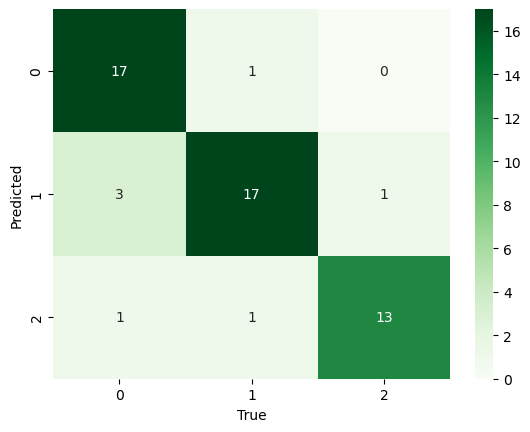

In [ ]:
cf = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cf, annot=True, cmap="Greens")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

In [ ]:
y_test_pred_proba = dt.predict_proba(X_test)

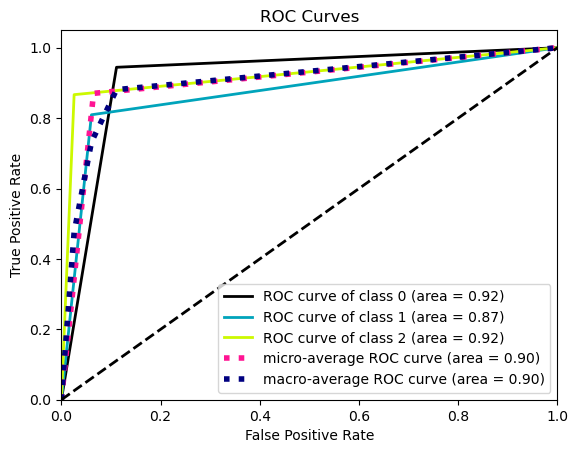

0.9038794538794539


In [ ]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
plot_roc(y_test, dt.predict_proba(X_test))
plt.show()
print(roc_auc_score(y_test, y_test_pred_proba, multi_class="ovr", average="macro"))

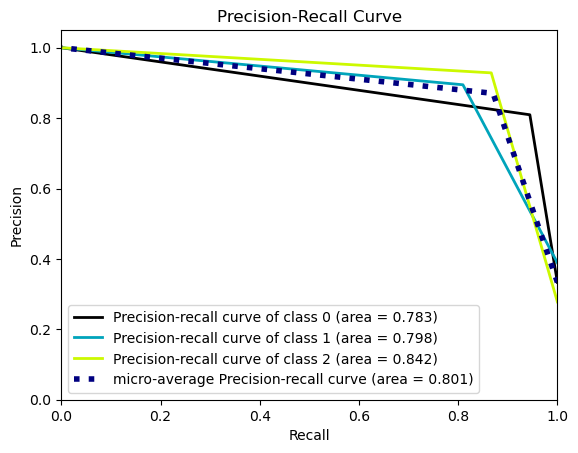

In [ ]:
plot_precision_recall(y_test, dt.predict_proba(X_test))
plt.show()

#### Cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
max_depth = 2
dt = DecisionTreeClassifier(max_depth=max_depth)
scores = cross_val_score(dt, X_train, y_train, cv=5)
cross_val_score(dt, X_train, y_train, cv=5)

array([0.96 , 0.8  , 0.76 , 0.8  , 0.875])

#### Decision Tree hyperparameters
max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less than
    min_samples_split samples.

min_samples_split : int or float, default=2
    The minimum number of samples required to split an internal node:

    - If int, then consider `min_samples_split` as the minimum number.
    - If float, then `min_samples_split` is a fraction and
      `ceil(min_samples_split * n_samples)` are the minimum
      number of samples for each split.

    .. versionchanged:: 0.18
       Added float values for fractions.

min_samples_leaf : int or float, default=1
    The minimum number of samples required to be at a leaf node.
    A split point at any depth will only be considered if it leaves at
    least ``min_samples_leaf`` training samples in each of the left and
    right branches.  This may have the effect of smoothing the model,
    especially in regression.

    - If int, then consider `min_samples_leaf` as the minimum number.
    - If float, then `min_samples_leaf` is a fraction and
      `ceil(min_samples_leaf * n_samples)` are the minimum
      number of samples for each node.

    .. versionchanged:: 0.18
       Added float values for fractions.

In [ ]:
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std()))

Accuracy: 0.8310 (+/- 0.06)


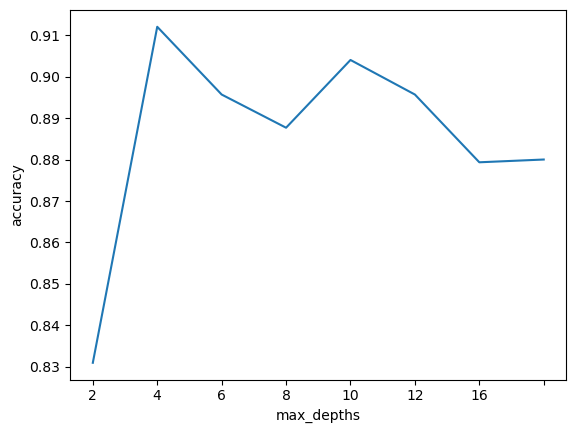

In [ ]:
max_depths = [2, 4, 6, 8, 10, 12, 16, None]
scores = list()
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    scores.append(cross_val_score(dt, X_train, y_train, cv=5).mean())
plt.plot(scores)
plt.xticks(range(len(max_depths)), max_depths)
plt.xlabel("max_depths")
plt.ylabel("accuracy")
plt.show()

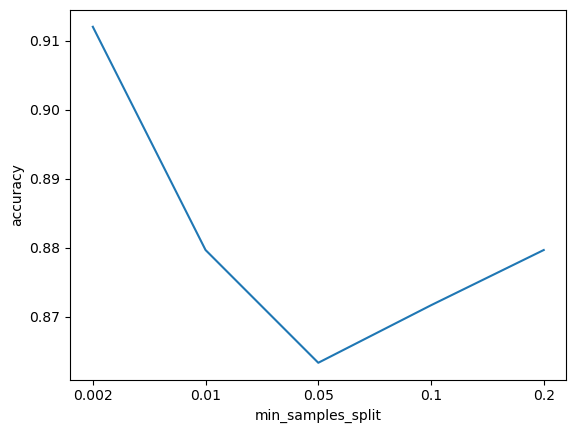

In [ ]:
min_samples_splits = [0.002, 0.01, 0.05, 0.1, 0.2]
scores = list()
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
    scores.append(cross_val_score(dt, X_train, y_train, cv=5).mean())
plt.plot(scores)
plt.xticks(range(len(min_samples_splits)), min_samples_splits)
plt.xlabel("min_samples_split")
plt.ylabel("accuracy")
plt.show()

#### Grid search

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
param_grid = {
    "min_samples_split": [0.002, 0.01, 0.05, 0.1, 0.2],
    "min_samples_leaf": [0.001, 0.01, 0.05, 0.1, 0.2],
    "max_depth": [2, 4, 6, 8, 10, 12, 16, None],
}

grid = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid=param_grid,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0),
    n_jobs=-1,
    refit=True,
)

In [ ]:
%%time
grid.fit(X_train, y_train)

CPU times: user 1.33 s, sys: 163 ms, total: 1.49 s
Wall time: 2.28 s


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=0),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12, 16, None],
                         'min_samples_leaf': [0.001, 0.01, 0.05, 0.1, 0.2],
                         'min_samples_split': [0.002, 0.01, 0.05, 0.1, 0.2]})

In [ ]:
clf = grid.best_estimator_

In [ ]:
print(grid.best_params_, grid.best_score_)

{'max_depth': 12, 'min_samples_leaf': 0.01, 'min_samples_split': 0.01} 0.8853666666666667


In [ ]:
clf.score(X_test, y_test)

0.9444444444444444

In [ ]:
from scipy.stats import uniform, randint, loguniform

In [ ]:
%%time
param_grid = {
    "min_samples_split": loguniform(1e-2, 1e0),
    "min_samples_leaf": uniform(0.001, 0.2),
    "max_depth": randint(2, 200),
    "criterion": ["gini", "entropy", "log_loss"],
}
grid = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_grid,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    n_iter=200,
)
grid.fit(X_train, y_train)
clf = grid.best_estimator_

CPU times: user 1.33 s, sys: 34.7 ms, total: 1.36 s
Wall time: 1.46 s


In [ ]:
print(grid.best_params_, grid.best_score_)

{'criterion': 'entropy', 'max_depth': 129, 'min_samples_leaf': 0.008258096213928211, 'min_samples_split': 0.026096837755570146} 0.9040666666666667


In [ ]:
clf.score(X_test, y_test)

0.9444444444444444

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
norm = StandardScaler()
norm.fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [ ]:
clf = KNeighborsClassifier(n_neighbors=5, metric="euclidean", weights="uniform")
clf.fit(X_train_norm, y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
clf.score(X_test_norm, y_test)

0.9814814814814815

In [ ]:
%%time
param_grid = {
    "n_neighbors": np.arange(1, X_train.shape[0]//2),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "cityblock"],
}

grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=param_grid,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    refit=True,
)
grid.fit(X_train_norm, y_train)
clf = grid.best_estimator_

CPU times: user 1.64 s, sys: 77.7 ms, total: 1.71 s
Wall time: 2.81 s


In [ ]:
print(grid.best_params_, grid.best_score_)

{'metric': 'cityblock', 'n_neighbors': 28, 'weights': 'distance'} 0.9565000000000002


In [ ]:
clf.score(X_test_norm, y_test)

1.0

In [ ]:
grid.cv_results_

{'mean_fit_time': array([0.00022585, 0.00015475, 0.00014873, 0.00015039, 0.0001506 ,
        0.00014011, 0.00013828, 0.00016768, 0.0001355 , 0.0001589 ,
        0.00015852, 0.00014631, 0.00014421, 0.00014232, 0.00013838,
        0.00015199, 0.00014827, 0.00014575, 0.00014751, 0.00013463,
        0.00016037, 0.00015617, 0.00013427, 0.0001327 , 0.00013548,
        0.00013875, 0.00023779, 0.00013589, 0.0001903 , 0.00013435,
        0.0001418 , 0.0001316 , 0.00014085, 0.00013045, 0.00015374,
        0.0001396 , 0.00014838, 0.00013733, 0.00013726, 0.00013184,
        0.00013129, 0.00013269, 0.00012891, 0.00016405, 0.00014305,
        0.00019032, 0.00013696, 0.00013186, 0.00014966, 0.00013168,
        0.00015461, 0.00013447, 0.0001328 , 0.00013155, 0.00013265,
        0.00027707, 0.00016282, 0.00013361, 0.00013129, 0.00016009,
        0.00013312, 0.00014358, 0.00015519, 0.00013011, 0.00013371,
        0.00014408, 0.00015786, 0.0001309 , 0.00016199, 0.0001334 ,
        0.00015244, 0.00020911,

In [ ]:
results = pd.DataFrame(grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,...,split43_test_score,split44_test_score,split45_test_score,split46_test_score,split47_test_score,split48_test_score,split49_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000226,0.000142,0.138454,0.315209,euclidean,1,uniform,"{'metric': 'euclidean', 'n_neighbors': 1, 'wei...",0.92,0.92,...,0.92,0.833333,1.00,0.96,0.84,0.96,0.875000,0.924067,0.041857,201
1,0.000155,0.000026,0.000407,0.000051,euclidean,1,distance,"{'metric': 'euclidean', 'n_neighbors': 1, 'wei...",0.92,0.92,...,0.92,0.833333,1.00,0.96,0.84,0.96,0.875000,0.924067,0.041857,201
2,0.000149,0.000024,0.000746,0.000055,euclidean,2,uniform,"{'metric': 'euclidean', 'n_neighbors': 2, 'wei...",0.88,0.92,...,0.88,0.833333,0.92,0.88,0.80,0.88,0.916667,0.882100,0.057200,236
3,0.000150,0.000068,0.000393,0.000094,euclidean,2,distance,"{'metric': 'euclidean', 'n_neighbors': 2, 'wei...",0.92,0.92,...,0.92,0.833333,1.00,0.96,0.84,0.96,0.875000,0.924067,0.041857,201
4,0.000151,0.000062,0.000764,0.000176,euclidean,3,uniform,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei...",0.96,1.00,...,0.88,0.875000,0.96,0.92,0.88,0.88,0.875000,0.918333,0.047795,215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,0.000296,0.001118,0.000785,0.001564,cityblock,59,distance,"{'metric': 'cityblock', 'n_neighbors': 59, 'we...",0.92,1.00,...,1.00,0.833333,0.96,0.88,1.00,0.88,0.916667,0.952367,0.041915,7
240,0.000157,0.000080,0.000961,0.000438,cityblock,60,uniform,"{'metric': 'cityblock', 'n_neighbors': 60, 'we...",0.88,0.80,...,0.92,0.875000,0.84,0.68,0.84,0.96,0.916667,0.854467,0.067504,240
241,0.000170,0.000100,0.000660,0.000357,cityblock,60,distance,"{'metric': 'cityblock', 'n_neighbors': 60, 'we...",0.92,1.00,...,1.00,0.833333,0.96,0.88,1.00,0.92,0.958333,0.951567,0.042208,13
242,0.000163,0.000107,0.001026,0.000768,cityblock,61,uniform,"{'metric': 'cityblock', 'n_neighbors': 61, 'we...",0.88,0.80,...,0.84,0.875000,0.80,0.68,0.84,0.96,0.916667,0.847233,0.065497,242


In [ ]:
results["metric_weight"] = results["param_metric"] + " , " + results["param_weights"]

<AxesSubplot:xlabel='param_n_neighbors', ylabel='mean_test_score'>

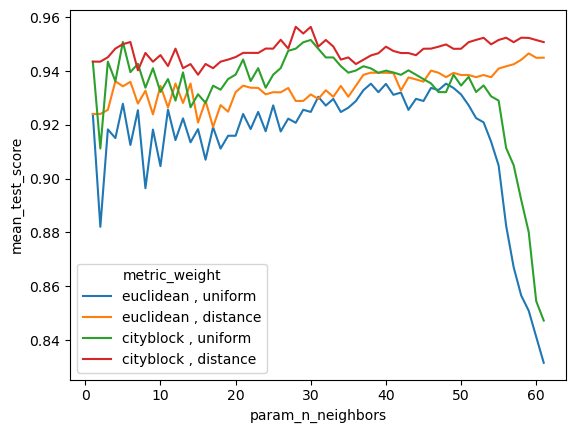

In [ ]:
sns.lineplot(
    data=results, x="param_n_neighbors", y="mean_test_score", hue="metric_weight"
)

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB

#### Gaussian

In [ ]:
clf = GaussianNB()

In [ ]:
%%time
clf.fit(X_train, y_train)

CPU times: user 1.21 ms, sys: 1.4 ms, total: 2.62 ms
Wall time: 1.27 ms


GaussianNB()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.95      0.95      0.95        21
           2       0.94      1.00      0.97        15

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.96      0.96      0.96        54



In [ ]:
clf.predict_proba(X_test)

array([[1.00000000e+00, 2.75257670e-14, 1.04870487e-39],
       [1.18075161e-12, 1.00000000e+00, 4.27243743e-13],
       [1.00000000e+00, 6.39106222e-12, 5.85259085e-40],
       [9.99992606e-01, 7.39368512e-06, 9.66004069e-36],
       [3.33977521e-02, 9.66602248e-01, 3.27395184e-38],
       [4.67086027e-25, 1.71803186e-09, 9.99999998e-01],
       [1.86365965e-14, 9.99998330e-01, 1.66978467e-06],
       [4.78565582e-22, 3.02380966e-19, 1.00000000e+00],
       [9.99999995e-01, 5.19731192e-09, 2.67084322e-33],
       [2.62680051e-23, 2.15160560e-13, 1.00000000e+00],
       [1.00000000e+00, 1.33270905e-11, 1.30223551e-36],
       [1.85530415e-06, 9.99998145e-01, 3.34477393e-24],
       [5.89770702e-25, 8.99087313e-17, 1.00000000e+00],
       [1.00000000e+00, 1.46363879e-11, 2.31408398e-43],
       [2.91913408e-25, 2.17208362e-10, 1.00000000e+00],
       [5.21619199e-16, 2.73805190e-05, 9.99972619e-01],
       [9.51426433e-01, 4.85735675e-02, 2.49818123e-32],
       [9.99912075e-01, 8.79247

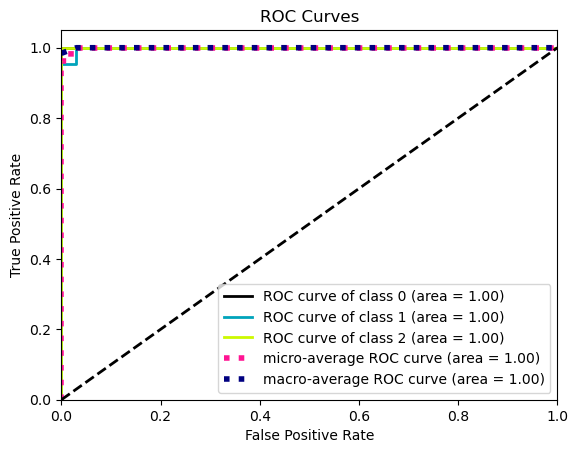

0.9995189995189996


In [ ]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
plot_roc(y_test, clf.predict_proba(X_test))
plt.show()
print(roc_auc_score(y_test, clf.predict_proba(X_test), multi_class="ovr", average="macro"))

#### Categorical

In [ ]:
non_cat_columns = [
    "alcohol",
    "malic_acid",
    "ash",
    "alcalinity_of_ash",
    "magnesium",
    "total_phenols",
    "flavanoids",
    "nonflavanoid_phenols",
    "proanthocyanins",
    "color_intensity",
    "hue",
    "od280/od315_of_diluted_wines",
    "proline",
]

X_noncat = df[non_cat_columns].values

X_train_noncat, X_test_noncat, y_train_noncat, y_test_noncat = train_test_split(
    X_noncat, y, test_size=0.3, stratify=y, random_state=0
)

# train and test set should be binned separately
X_train_cat = list()
for column_idx in range(X_train_noncat.shape[1]):
    X_train_cat.append(pd.qcut(X_train_noncat[:, column_idx], q=4, labels=False))
X_train_cat = np.array(X_train_cat).T

X_test_cat = list()
for column_idx in range(X_test_noncat.shape[1]):
    X_test_cat.append(pd.qcut(X_test_noncat[:, column_idx], q=4, labels=False))
X_test_cat = np.array(X_test_cat).T

print(X_train_cat.shape, X_test_cat.shape)

(124, 13) (54, 13)


In [ ]:
clf = CategoricalNB()
clf.fit(X_train_cat, y_train_noncat)

CategoricalNB()

In [ ]:
y_pred = clf.predict(X_test_cat)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.90      0.95        21
           2       0.88      1.00      0.94        15

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



# Binary Classification Example

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
X, y = load_breast_cancer(return_X_y=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=0
)

In [ ]:
clf = GaussianNB()

In [ ]:
clf.fit(X_train, y_train)

GaussianNB()

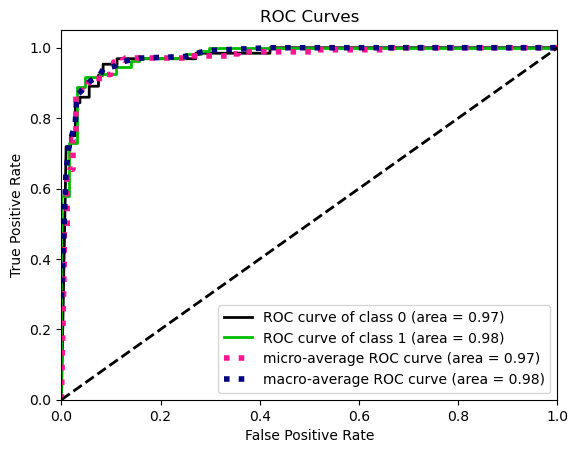

In [ ]:
plot_roc(y_test, clf.predict_proba(X_test))
plt.show()

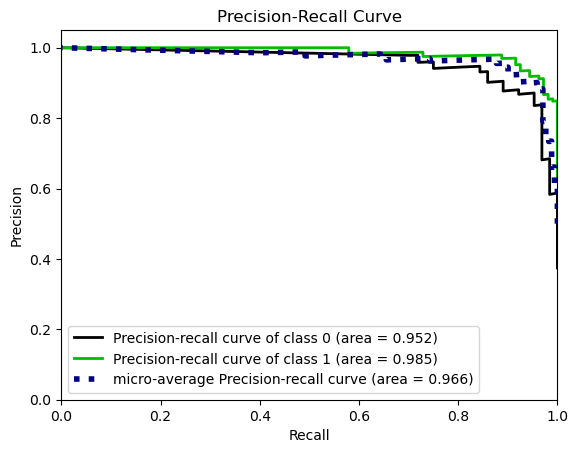

In [ ]:
plot_precision_recall(y_test, clf.predict_proba(X_test))
plt.show()

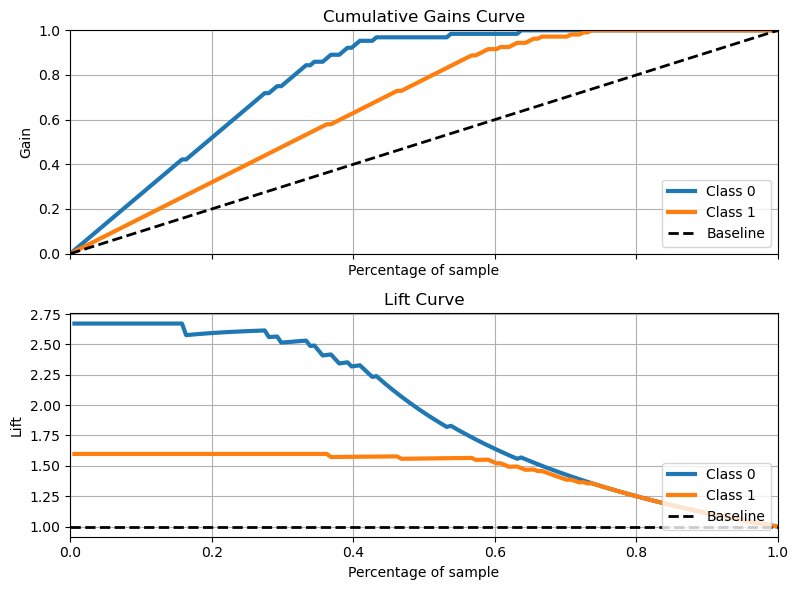

In [ ]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(8,6))
plot_cumulative_gain(y_test, clf.predict_proba(X_test), ax=axs[0])
plot_lift_curve(y_test, clf.predict_proba(X_test), ax=axs[1])
plt.tight_layout()
plt.show()